In [91]:
import numpy as np

### 3.1.3 Classification of samples that are not linearly separable

In [92]:
n = 100

# label a
mA = [-3, 2]
sigma = 0.5
aX1 = np.random.normal(mA[0], sigma, n)
aX2 = np.random.normal(mA[1], sigma, n)
a = np.vstack((aX1, aX2, np.zeros(n)))
a.shape, a[:,:5]

((3, 100),
 array([[-3.03319801, -3.2732721 , -3.8057892 , -2.17410891, -3.38067874],
        [ 2.11956766,  2.53453961,  2.59024282,  2.33765696,  1.34154767],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]]))

In [93]:
# label b
mB = [-2, 1]
bX1 = np.random.normal(mB[0], sigma, n)
bX2 = np.random.normal(mB[1], sigma, n)
b = np.vstack((bX1, bX2, np.ones(n)))
b.shape, b[:,:5]

((3, 100),
 array([[-1.6992387 , -2.93086178, -1.58637356, -2.74267613, -1.54364555],
        [ 1.63165658, -0.39125494,  1.39915507,  0.93936988,  0.98953487],
        [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ]]))

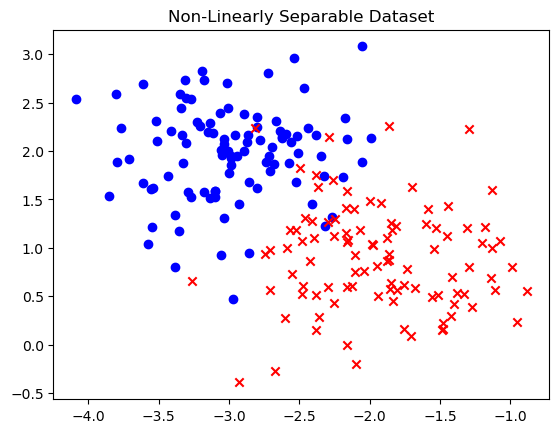

In [94]:
import matplotlib.pyplot as plt
plt.title("Non-Linearly Separable Dataset")
plt.scatter(aX1, aX2, c='b', label='a', marker='o')
plt.scatter(bX1, bX2, c='r', label='b', marker='x')
plt.show()

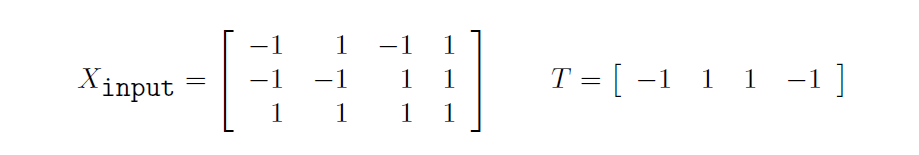

In [95]:
dataset = np.hstack((a,b))
dataset[:,:5], dataset.shape

(array([[-3.03319801, -3.2732721 , -3.8057892 , -2.17410891, -3.38067874],
        [ 2.11956766,  2.53453961,  2.59024282,  2.33765696,  1.34154767],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]]),
 (3, 200))

In [96]:
# shuffling the dataset horizontally...
rng = np.random.default_rng()
rng.shuffle(dataset, axis=1)
dataset[:,:5]

array([[-2.71157438, -1.8776945 , -3.17590652, -1.6755319 , -2.55893367],
       [ 0.56656081,  0.86439744,  2.73454863,  0.58370599,  2.0973415 ],
       [ 1.        ,  1.        ,  0.        ,  1.        ,  0.        ]])

In [97]:
dataset = np.vstack((np.ones(2*n), dataset))
dataset.shape, dataset[:,:5]

((4, 200),
 array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [-2.71157438, -1.8776945 , -3.17590652, -1.6755319 , -2.55893367],
        [ 0.56656081,  0.86439744,  2.73454863,  0.58370599,  2.0973415 ],
        [ 1.        ,  1.        ,  0.        ,  1.        ,  0.        ]]))

In [98]:
X_train = dataset[:3,:]
y_train = dataset[3,:]
X_train.shape, y_train.shape

((3, 200), (200,))

The weights are stored in matrix W with as many columns as the dimensionality of the input patterns and with the number of rows matching the number of the
outputs (dimensionality of the output).

----------

### Part 1
Apply and compare perceptron learning and the delta rules using either batch or sequential learning mode, similarly as in the previous exercise (p.1, section 3.1.2).

**Perceptron Learning Principle**: weights are changed whenever a pattern is misclassified

### Perceptron Perceptron

In [99]:
class PerceptronLearningClassifier:
    def __init__(self, learning_rate):
        self.W = np.random.rand(3)
        self.learning_rate = learning_rate
        self.epochs = 0

    def predict(self, X):
        #print(np.array((self.W @ X) > 0, dtype=int))
        return np.array((self.W @ X) > 0, dtype=int)

    def fit(self, X, y, n_epochs, batch_size = 0):
        if (batch_size == 0):
            for i in range(0, n_epochs):
                predictions = self.predict(X)
                e = y_train - predictions
                dW = self.learning_rate * (e @ X.T)
                self.W += dW

                nErrors = np.sum( np.array(e != 0, dtype=int) )
                print("After {} epochs: {} errors".format(self.epochs, nErrors))
                self.epochs += 1
                if (nErrors == 0):
                    return True
            return False
                

    def fit_one_epoch(self, X, y):
        nErrors = 0
        for i in range(0, X.shape[1]):
            prediction = np.array((self.W @ X[:,i]) > 0, dtype=int)
            e = y[i] - prediction
            if (e != 0):
                nErrors += 1
            dW = self.learning_rate * (e * X[:,i])
            self.W = self.W + dW
        print("Errors this epoch:" + str(nErrors))
        if (nErrors == 0):
            return True
        else:
            return False

In [100]:
p1 = PerceptronLearningClassifier(0.1)

#### Initial Weights Plot

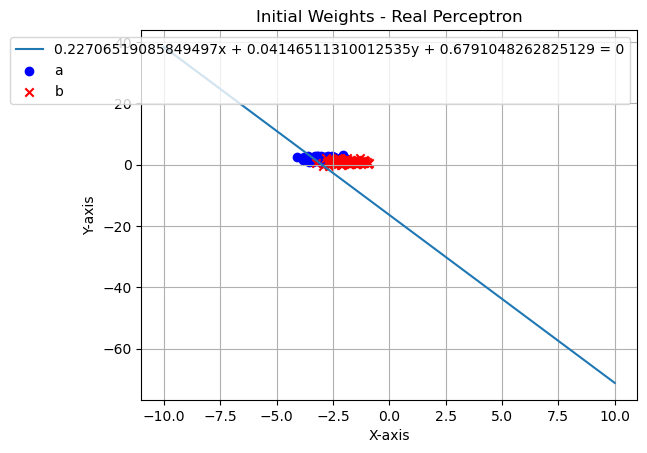

[0.67910483 0.22706519 0.04146511]


In [101]:
x = np.linspace(-10, 10, 10)
a = p1.W[1]
b = p1.W[2]
c = p1.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.title("Initial Weights - Real Perceptron")

plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(aX1, aX2, c='b', label='a', marker='o')
plt.scatter(bX1, bX2, c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p1.W)

#### Final weights plot

After 0 epochs: 81 errors
After 1 epochs: 100 errors
After 2 epochs: 100 errors
After 3 epochs: 100 errors
After 4 epochs: 100 errors
After 5 epochs: 99 errors
After 6 epochs: 100 errors
After 7 epochs: 87 errors
After 8 epochs: 100 errors
After 9 epochs: 100 errors
After 10 epochs: 32 errors
After 11 epochs: 40 errors
After 12 epochs: 70 errors
After 13 epochs: 100 errors
After 14 epochs: 100 errors
After 15 epochs: 41 errors
After 16 epochs: 80 errors
After 17 epochs: 100 errors
After 18 epochs: 29 errors
After 19 epochs: 27 errors
After 20 epochs: 38 errors
After 21 epochs: 63 errors
After 22 epochs: 99 errors
After 23 epochs: 100 errors
After 24 epochs: 45 errors
After 25 epochs: 88 errors
After 26 epochs: 99 errors
After 27 epochs: 25 errors
After 28 epochs: 25 errors
After 29 epochs: 23 errors
After 30 epochs: 24 errors
After 31 epochs: 23 errors
After 32 epochs: 29 errors
After 33 epochs: 38 errors
After 34 epochs: 83 errors
After 35 epochs: 99 errors
After 36 epochs: 18 errors


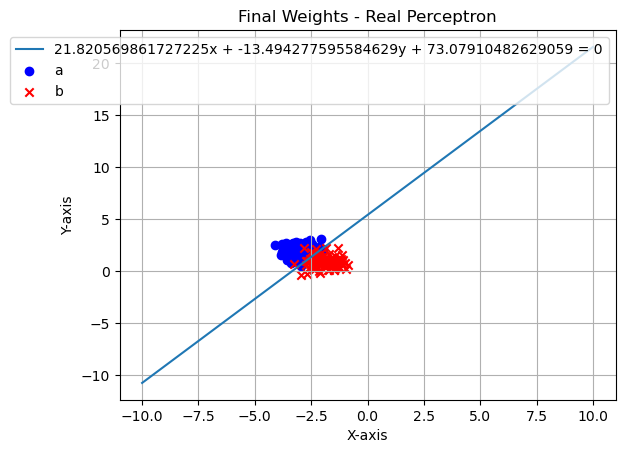

[ 73.07910483  21.82056986 -13.4942776 ]


In [102]:
while (p1.fit(X_train, y_train, 1) == False):
    if (p1.epochs > 5000):
        print("No convergence after 5000 epochs...")
        break
    pass

x = np.linspace(-10, 10, 10)
a = p1.W[1]
b = p1.W[2]
c = p1.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.title("Final Weights - Real Perceptron")

plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(aX1, aX2, c='b', label='a', marker='o')
plt.scatter(bX1, bX2, c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p1.W)

After 5000 epochs there still is no convergence: even though this is in theory not enough to determine the two classes aren't linearly separable, we can be fairly sure about it

------------

### Delta Rule Perceptron

In [103]:
y_train = y_train * 2 - 1 # {0,1} - > {-1, +1}
y_train[:5]

array([ 1.,  1., -1.,  1., -1.])

In [104]:
class PerceptronDeltaRuleClassifier:
    def __init__(self, learning_rate):
        self.W = np.random.rand(3)
        self.learning_rate = learning_rate
        self.epochs = 0

    def predict(self, X):
        return np.array((self.W @ X) > 0, dtype=int) * 2 - 1

    def fit(self, X, y, n_epochs, batch_size = 0):
        if (batch_size == 0):
            for _ in range(0, n_epochs):
                predictions = self.W @ X # without step function
                e = y - predictions 
                dW = self.learning_rate * (e @ X.T)
                self.W += dW

                predErrors = y - ( np.array((self.W @ X) > 0, dtype=int) * 2 - 1 )
                nErrors = np.sum( np.array(predErrors != 0, dtype=int))
                print("After {} epochs: {} errors".format(self.epochs, nErrors))
                self.epochs += 1
                if (nErrors == 0):
                    return True
        else:
            for _ in range(0, n_epochs):
                idx = 0
                while (idx < X.shape[1]):
                    next_idx = idx + batch_size
                    print(X[:, idx:next_idx].shape)
                    predictions = self.W @ X[:, idx:next_idx] # without step function
                    print(predictions.shape)
                    e = y[idx:next_idx] - predictions
                    print(e.shape)
                    dW = self.learning_rate * (e @ X[:, idx:next_idx])
                    self.W += dW

                    self.epochs += 1
                    idx = next_idx
                    print("done")
        
    def fit_one_epoch(self, X, y):
        for i in range(0, X.shape[1]): # for each sample
        # for i in range(0, 3):
            prediction = self.W @ X[:,i]    # compute the prediction 
            #print(prediction)
            e = y[i] - prediction         # calculate the error
            print(e)
            dW = self.learning_rate * (e * X[:,i])  
            #print(dW)
            self.W = self.W + dW
            #print(self.W)
            if (i%10 == 0):
                print("Weights after {} points: {}".format(i, self.W))

        # after the epoch see how many are wrongly classified
        pred_labels = self.predict(X)
        pred_errors = y - pred_labels
        nErrors = np.sum(np.array(pred_errors != 0, dtype=int))
        print("Errors after this epoch:" + str(nErrors))

In [105]:
p2 = PerceptronDeltaRuleClassifier(0.01)

In [106]:
p2.W

array([0.43479964, 0.1507203 , 0.43033104])

In [107]:
X_train[:, :5]

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-2.71157438, -1.8776945 , -3.17590652, -1.6755319 , -2.55893367],
       [ 0.56656081,  0.86439744,  2.73454863,  0.58370599,  2.0973415 ]])

In [108]:
# p2.fit_one_epoch(X_train, y_train)
# p2.W

#### Initial weights plot

[0.43479964 0.1507203  0.43033104]
0.1507203042016111 0.43033103879642187 0.4347996436039906


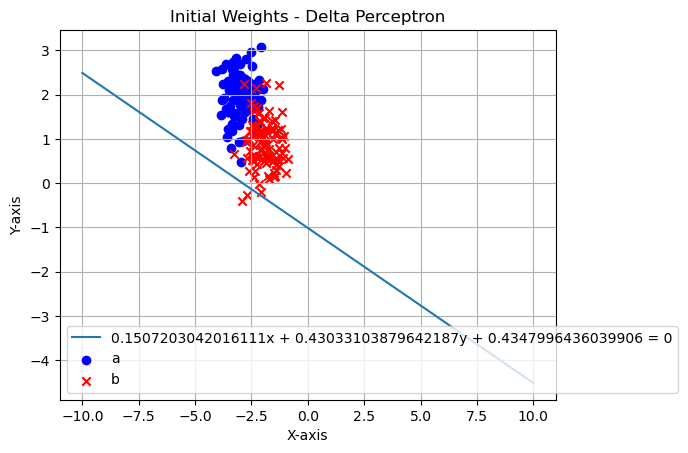

[0.43479964 0.1507203  0.43033104]


In [109]:
x = np.linspace(-10, 10, 10)
print(p2.W)
a = p2.W[1]
b = p2.W[2]
c = p2.W[0]
print(a,b,c)
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.title("Initial Weights - Delta Perceptron")

plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(aX1, aX2, c='b', label='a', marker='o')
plt.scatter(bX1, bX2, c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p2.W)

In [110]:
p2.W

array([0.43479964, 0.1507203 , 0.43033104])

#### Final weights plot

In [111]:
# for _ in range(200):
#     p2.fit(X_train, y_train, 1, 20)

for _ in range(200):
    p2.fit_one_epoch(X_train, y_train)


0.7300809711390654
Weights after 0 points: [0.44210045 0.13092362 0.43446739]
0.4281815999587988
-2.2543085058452395
0.6822366108968179
-1.7603059636104605
0.7157527628313953
-1.5699365535961267
0.692959046995949
-1.5465780637628497
0.7491127037918803
1.1702785844289807
Weights after 10 points: [0.41517438 0.23937654 0.30349303]
-1.3352100128259656
0.8793980057137908
-1.2169350980840745
0.5939379199693257
-1.2122512136217143
-0.943300947552787
1.081016166939232
0.9933080208929633
-0.9602712770699025
-0.9183378473876362
Weights after 20 points: [0.38478791 0.36821    0.20120817]
-0.5719228962606778
1.2531743284376347
-0.4308956483134059
0.9603716111070367
1.405140667935394
1.0375828292299993
-1.0683235180832766
1.1071752349555575
-0.821639083195546
-0.578196251093341
Weights after 30 points: [0.40771259 0.36943599 0.15759271]
-0.3470285440308004
-0.6648565603076232
1.1744247713535996
-0.585895353714283
-0.5146077528573707
0.037745176900479294
1.2333828879840276
1.0708110717499308
-0.413

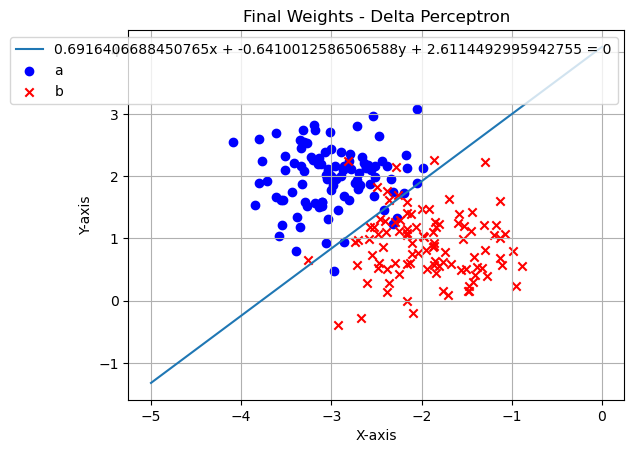

[ 2.6114493   0.69164067 -0.64100126]


In [112]:
x = np.linspace(-5, 0, 10)
a = p2.W[1]
b = p2.W[2]
c = p2.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.title("Final Weights - Delta Perceptron")

plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(aX1, aX2, c='b', label='a', marker='o')
plt.scatter(bX1, bX2, c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p2.W)

------------------

----------------

-------------


# Assignment from now on

Then apply the delta learning rule in batch mode to this new dataset as well as to different versions of the subsampled data, i.e. before training please remove 25% of data samples (for two classes with n=100 samples each, remove 50 samples) according to the following scenarios:
- random 25% from each class
- random 50% from classA
- random 50% from classB
- 20% from a subset of classA for which classA(1,:)<0 and 80% from a
subset of classA for which classA(1,:)>0

### Let's generate the dataset again

In [113]:
n = 100

# label a
mA = [1.0, 0.3]
sigma = 0.2
aX1 = np.random.normal(mA[0], sigma, n)
aX2 = np.random.normal(mA[1], sigma, n)
a = np.vstack((aX1, aX2, (-1) * np.ones(n)))
a.shape, a[:,:5]

((3, 100),
 array([[ 0.85174577,  0.95527503,  0.90754784,  0.99810596,  0.77821676],
        [ 0.32206871,  0.09920432,  0.27339545, -0.01229784,  0.39566746],
        [-1.        , -1.        , -1.        , -1.        , -1.        ]]))

In [114]:
# label b
mB = [0, -0.1]
sigma = 0.5
bX1 = np.random.normal(mB[0], sigma, n)
bX2 = np.random.normal(mB[1], sigma, n)
b = np.vstack((bX1, bX2, np.ones(n)))
b.shape, b[:,:5]

((3, 100),
 array([[ 0.60149815, -0.21577708, -1.16784543, -0.29401684,  0.16878055],
        [ 0.70603286, -0.32907098,  1.26068661, -0.34360344,  0.37887462],
        [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ]]))

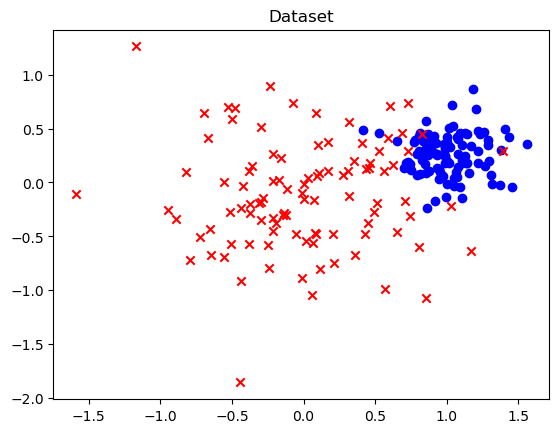

In [115]:
import matplotlib.pyplot as plt
plt.title("Dataset")

plt.scatter(aX1, aX2, c='b', label='a', marker='o')
plt.scatter(bX1, bX2, c='r', label='b', marker='x')

Shuffling the two classes..

In [116]:
rng = np.random.default_rng()
rng.shuffle(a, axis=1)
rng.shuffle(b, axis=1)

## (1)

... then taking out 25% from each

In [117]:
lim = int(0.75*n)
a_holdout = a[:, lim:]
a_new = a[:, :lim]
a_new.shape, a_holdout.shape

((3, 75), (3, 25))

In [118]:
a_new[:,:5]

array([[ 1.40877516,  1.15566977,  0.81572654,  0.76891938,  0.98791834],
       [ 0.49569193,  0.0872762 ,  0.45864531,  0.37281997,  0.18322508],
       [-1.        , -1.        , -1.        , -1.        , -1.        ]])

In [119]:
lim = int(0.75*n)
b_holdout = b[:, lim:]
b_new = b[:, :lim]
b_new.shape, b_holdout.shape

((3, 75), (3, 25))

In [120]:
dataset = np.hstack((a_new,b_new))
dataset[:,:5], dataset.shape

(array([[ 1.40877516,  1.15566977,  0.81572654,  0.76891938,  0.98791834],
        [ 0.49569193,  0.0872762 ,  0.45864531,  0.37281997,  0.18322508],
        [-1.        , -1.        , -1.        , -1.        , -1.        ]]),
 (3, 150))

shuffle the entire dataset

In [121]:
rng.shuffle(dataset, axis=1)
dataset[:,:5]

array([[ 1.04735277,  0.211968  , -0.43825681,  0.81554121,  1.37301995],
       [-0.03105101, -0.74937311, -0.91320694,  0.07984609, -0.02547422],
       [-1.        ,  1.        ,  1.        , -1.        , -1.        ]])

stack the bias

In [122]:
dataset = np.vstack((np.ones(2*lim), dataset))
dataset.shape, dataset[:,:5]

((4, 150),
 array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 1.04735277,  0.211968  , -0.43825681,  0.81554121,  1.37301995],
        [-0.03105101, -0.74937311, -0.91320694,  0.07984609, -0.02547422],
        [-1.        ,  1.        ,  1.        , -1.        , -1.        ]]))

split in X and y

In [123]:
X_train = dataset[:3,:]
y_train = dataset[3,:]
X_train.shape, y_train.shape

((3, 150), (150,))

In [124]:
X_train[:,:5], y_train[:5]

(array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 1.04735277,  0.211968  , -0.43825681,  0.81554121,  1.37301995],
        [-0.03105101, -0.74937311, -0.91320694,  0.07984609, -0.02547422]]),
 array([-1.,  1.,  1., -1., -1.]))

initialize a DeltaRulePerceptron

In [125]:
y_train[:5]

array([-1.,  1.,  1., -1., -1.])

In [126]:
p = PerceptronDeltaRuleClassifier(0.01)

- show initial weights

In [127]:
x = np.linspace(-1, 2, 10)

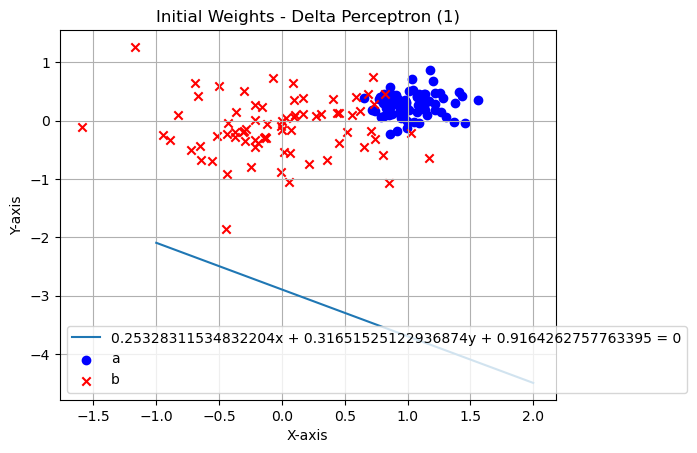

[0.91642628 0.25328312 0.31651525]


In [128]:
_a = p.W[1]
_b = p.W[2]
_c = p.W[0]
y = (-_a / _b) * x - (_c / _b) # ax + by + c = 0
plt.title("Initial Weights - Delta Perceptron (1)")

plt.plot(x, y, label=f'{_a}x + {_b}y + {_c} = 0')
plt.scatter(a_new[0,:], a_new[1,:], c='b', label='a', marker='o')
plt.scatter(b_new[0,:], b_new[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p.W)

... train and then plot...

In [129]:
for _ in range(200):
    p.fit_one_epoch(X_train, y_train)

-2.171874932760054
Weights after 0 points: [0.89470753 0.23053592 0.31718964]
0.2941196212133572
0.49130546616046633
-2.114117884738186
-2.1643110137169046
-2.0447702061365236
0.43695104840846377
0.09573042816276078
0.34631594843982705
-2.046235939874638
-2.0982780001284222
Weights after 10 points: [0.80667462 0.12119878 0.29155633]
0.35024834054367093
-1.9957337053880018
-1.9231613374658107
0.43326199345356886
0.15037302748512327
0.30934592110273984
0.12308323634149554
-1.8259301836320776
-1.8332985094420327
-1.8767432490203309
Weights after 20 points: [0.72578908 0.0280867  0.27567778]
-1.768892211326484
0.33918594842269567
0.26664177714122483
-1.7623048446203744
0.39473349851921957
0.23785242550359575
-1.827060832289415
-1.7676017603866088
0.39673262699716894
-1.6507666869313047
Weights after 30 points: [ 0.65437428 -0.06901568  0.25066773]
-1.7130831931840511
-1.6522320115123996
0.2963835242102695
-1.6122524660829114
-1.5676478847808577
-1.3865772026902452
0.36486158465758767
0.444

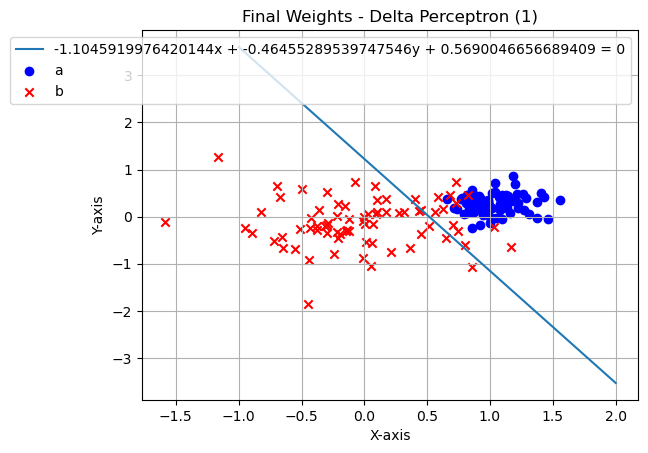

[ 0.56900467 -1.104592   -0.4645529 ]


In [130]:
_a = p.W[1]
_b = p.W[2]
_c = p.W[0]
y = (-_a / _b) * x - (_c / _b) # ax + by + c = 0
plt.title("Final Weights - Delta Perceptron (1)")

plt.plot(x, y, label=f'{_a}x + {_b}y + {_c} = 0')
plt.scatter(a_new[0,:], a_new[1,:], c='b', label='a', marker='o')
plt.scatter(b_new[0,:], b_new[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p.W)

.. as expected there's no difference in evidence

In [131]:
holdout = np.hstack((a_holdout, b_holdout))
holdout[:,:5]

array([[ 1.10595619,  0.52432504,  1.2860733 ,  0.99912237,  0.41200597],
       [ 0.18419228,  0.46304907,  0.34741128,  0.37851678,  0.48594572],
       [-1.        , -1.        , -1.        , -1.        , -1.        ]])

In [132]:
X_holdout = np.vstack((np.ones(50), holdout[:2, :]))
y_holdout = holdout[2,:]
X_holdout[:,:5], y_holdout[:5]

(array([[1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.10595619, 0.52432504, 1.2860733 , 0.99912237, 0.41200597],
        [0.18419228, 0.46304907, 0.34741128, 0.37851678, 0.48594572]]),
 array([-1., -1., -1., -1., -1.]))

In [133]:
predictions = p.predict(X_holdout)
diff = predictions - y_holdout
predictions, diff

(array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2., -2., -2.,  0.,  0.,
         0., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2.]))

In [134]:
accuracy = np.sum(np.array(diff == 0, dtype=int)) / len(diff)
accuracy

0.9

In [135]:
# accuracy on a
diff = predictions[:25] - y_holdout[:25] #the as are before
predictions[:25], y_holdout[:25], diff

(array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]))

In [136]:
accuracy_a = np.sum(np.array(diff == 0, dtype=int)) / len(diff)
accuracy_a

1.0

In [137]:
# accuracy on b
diff = predictions[25:] - y_holdout[25:] #the as are before
predictions[25:], y_holdout[25:], diff

(array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1,
         1,  1,  1,  1,  1,  1,  1, -1]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2., -2., -2.,  0.,
         0.,  0., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2.]))

In [138]:
accuracy_b = np.sum(np.array(diff == 0, dtype=int)) / len(diff)
accuracy_b

0.8

-------------

- random 50% from classA

In [139]:
lim = int(0.5*n)
a_holdout = a[:, lim:]
a_new = a[:, :lim]
a_new.shape, a_holdout.shape

((3, 50), (3, 50))

In [140]:
b_new = b
b.shape

(3, 100)

In [141]:
dataset = np.hstack((a_new,b_new))
dataset[:,:5], dataset.shape

(array([[ 1.40877516,  1.15566977,  0.81572654,  0.76891938,  0.98791834],
        [ 0.49569193,  0.0872762 ,  0.45864531,  0.37281997,  0.18322508],
        [-1.        , -1.        , -1.        , -1.        , -1.        ]]),
 (3, 150))

In [142]:
dataset = np.vstack((np.ones(150), dataset))
dataset.shape, dataset[:,:5]

((4, 150),
 array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 1.40877516,  1.15566977,  0.81572654,  0.76891938,  0.98791834],
        [ 0.49569193,  0.0872762 ,  0.45864531,  0.37281997,  0.18322508],
        [-1.        , -1.        , -1.        , -1.        , -1.        ]]))

In [143]:
rng.shuffle(dataset, axis=1)
dataset[:,:5]

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.07903512,  0.85311691, -0.14249217,  0.08888592, -0.65234593],
       [ 0.26161171, -1.06778411, -0.30176405,  0.64285115, -0.43222445],
       [-1.        ,  1.        ,  1.        ,  1.        ,  1.        ]])

In [144]:
X_train = dataset[:3,:]
y_train = dataset[3,:]
X_train.shape, y_train.shape

((3, 150), (150,))

In [145]:
p = PerceptronDeltaRuleClassifier(0.01)

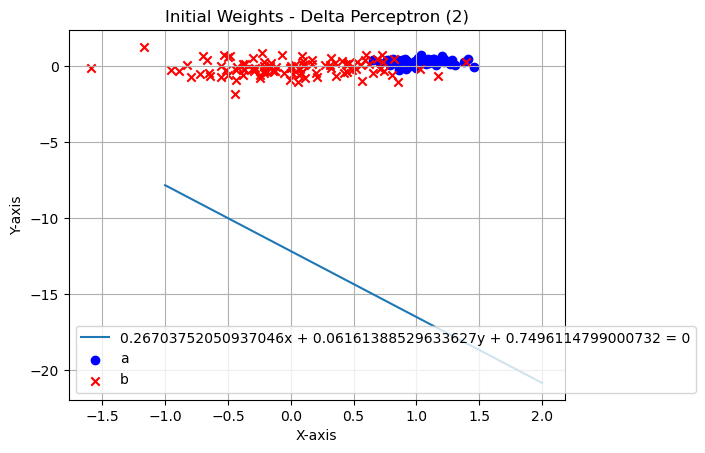

[0.74961148 0.26703752 0.06161389]


In [146]:
_a = p.W[1]
_b = p.W[2]
_c = p.W[0]
y = (-_a / _b) * x - (_c / _b) # ax + by + c = 0
plt.title("Initial Weights - Delta Perceptron (2)")

plt.plot(x, y, label=f'{_a}x + {_b}y + {_c} = 0')
plt.scatter(a_new[0,:], a_new[1,:], c='b', label='a', marker='o')
plt.scatter(b_new[0,:], b_new[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p.W)

In [147]:
for _ in range(200):
    p.fit_one_epoch(X_train, y_train)

-2.0538732573239233
Weights after 0 points: [0.72907275 0.24487551 0.05624071]
0.12207275492268088
0.3213258453614508
0.20998228304210775
0.4485489853385245
-1.9584168303834861
0.17446235060019843
0.2695164743852373
0.3586808095061217
0.33536500628241384
0.30953715853461394
Weights after 10 points: [0.7349835  0.22523936 0.04371787]
0.30126472179773833
-2.029315134370864
0.473566581221432
0.07566398222966708
-1.8979920638690553
0.35542288976606207
0.29178675814843147
-1.8667031198592499
0.2824236501081703
-1.8454475945423585
Weights after 20 points: [0.6763902  0.14799361 0.02130569]
0.376689796859883
0.3200391329103506
0.2504952854318899
0.26031882258950145
0.44273885199407803
0.33826304123536033
0.36237820736317006
-1.865202485347274
-1.835011033132129
-1.764695334553382
Weights after 30 points: [ 0.64525035  0.08230815 -0.00831983]
0.354659704599542
0.3849084650938642
0.38246451891160516
-1.7296326224442384
0.3217106373721068
0.34999481309678926
0.3585319224527317
0.3771863477616285

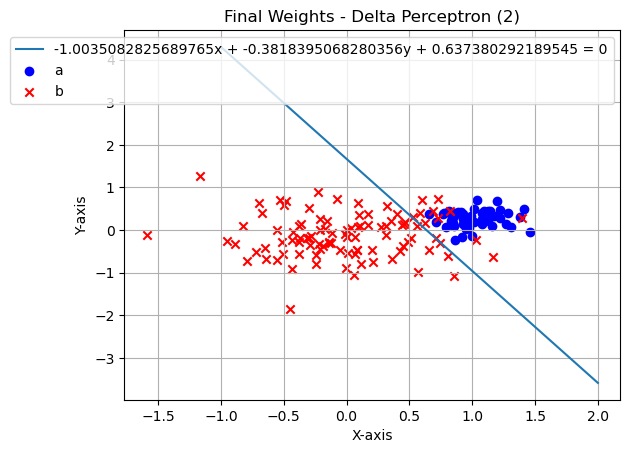

[ 0.63738029 -1.00350828 -0.38183951]


In [148]:
_a = p.W[1]
_b = p.W[2]
_c = p.W[0]
y = (-_a / _b) * x - (_c / _b) # ax + by + c = 0
plt.title("Final Weights - Delta Perceptron (2)")

plt.plot(x, y, label=f'{_a}x + {_b}y + {_c} = 0')
plt.scatter(a_new[0,:], a_new[1,:], c='b', label='a', marker='o')
plt.scatter(b_new[0,:], b_new[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p.W)

In [149]:
holdout = a_holdout
holdout[:,:5]

array([[ 1.37301995,  1.18027316,  0.99810596,  0.98327785,  1.43363926],
       [-0.02547422,  0.86910919, -0.01229784,  0.355005  ,  0.42590731],
       [-1.        , -1.        , -1.        , -1.        , -1.        ]])

In [150]:
X_holdout = np.vstack((np.ones(50), holdout[:2, :]))
y_holdout = holdout[2,:]
X_holdout[:,:5], y_holdout[:5]

(array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 1.37301995,  1.18027316,  0.99810596,  0.98327785,  1.43363926],
        [-0.02547422,  0.86910919, -0.01229784,  0.355005  ,  0.42590731]]),
 array([-1., -1., -1., -1., -1.]))

In [151]:
predictions = p.predict(X_holdout)
diff = predictions - y_holdout
predictions, diff

(array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [152]:
accuracy = np.sum(np.array(diff == 0, dtype=int)) / len(diff)
accuracy

0.98

------------

- random 50% from class B

In [153]:
a_new = a
a.shape

(3, 100)

In [154]:
lim = int(0.5*n)
b_holdout = b[:, lim:]
b_new = b[:, :lim]
b_new.shape, b_holdout.shape

((3, 50), (3, 50))

In [155]:
dataset = np.hstack((a_new,b_new))
dataset[:,:5], dataset.shape

(array([[ 1.40877516,  1.15566977,  0.81572654,  0.76891938,  0.98791834],
        [ 0.49569193,  0.0872762 ,  0.45864531,  0.37281997,  0.18322508],
        [-1.        , -1.        , -1.        , -1.        , -1.        ]]),
 (3, 150))

In [156]:
dataset = np.vstack((np.ones(150), dataset))
dataset.shape, dataset[:,:5]

((4, 150),
 array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 1.40877516,  1.15566977,  0.81572654,  0.76891938,  0.98791834],
        [ 0.49569193,  0.0872762 ,  0.45864531,  0.37281997,  0.18322508],
        [-1.        , -1.        , -1.        , -1.        , -1.        ]]))

In [157]:
rng.shuffle(dataset, axis=1)
dataset[:,:5]

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.05196073,  1.22018055,  0.9252816 , -0.28633744, -0.42507957],
       [ 0.03682667,  0.18073041,  0.36691368, -0.1399953 , -0.03666337],
       [-1.        , -1.        , -1.        ,  1.        ,  1.        ]])

In [158]:
X_train = dataset[:3,:]
y_train = dataset[3,:]
X_train.shape, y_train.shape

((3, 150), (150,))

In [159]:
p = PerceptronDeltaRuleClassifier(0.01)

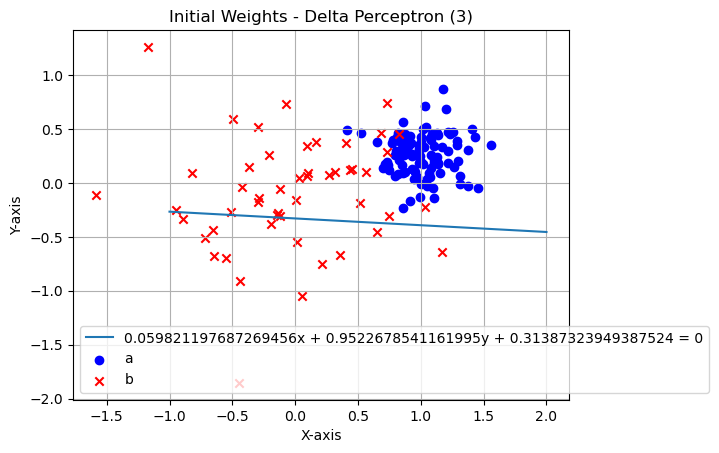

[0.31387324 0.0598212  0.95226785]


In [160]:
_a = p.W[1]
_b = p.W[2]
_c = p.W[0]
y = (-_a / _b) * x - (_c / _b) # ax + by + c = 0
plt.title("Initial Weights - Delta Perceptron (3)")

plt.plot(x, y, label=f'{_a}x + {_b}y + {_c} = 0')
plt.scatter(a_new[0,:], a_new[1,:], c='b', label='a', marker='o')
plt.scatter(b_new[0,:], b_new[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p.W)

In [161]:
for _ in range(200):
    p.fit_one_epoch(X_train, y_train)

-1.4118716418801918
Weights after 0 points: [0.29975452 0.04496886 0.95174791]
-1.526634441225054
-1.6570581506778048
0.8672374155834163
0.7615597381473657
1.3717482497709947
-1.1632786117743878
0.9362548426092069
-0.476347413526544
-1.5741773191028945
-1.3376222663014568
Weights after 10 points: [ 0.26177134 -0.0309268   0.91948384]
0.9406513486535846
-1.3875055739573503
-1.5555387682578206
-1.5663053734931136
1.4519672429467612
0.19826497179324887
-1.53603486998343
-1.5328430545053582
-1.3135397515383116
-1.181439093208896
Weights after 20 points: [ 0.18694811 -0.1206291   0.87710956]
0.7172675022842702
-1.2809217676838236
0.9326144626259544
0.5229319237627688
-1.4179977445376617
0.7839592910511158
-1.4335611969222217
-1.44264475841333
-1.0023787638135566
-1.482993286645339
Weights after 30 points: [ 0.13591087 -0.20592147  0.84592577]
-1.2337407278376666
1.0091461933006374
0.6304041631131836
1.2923292995570241
-1.0318804214288742
-0.8052876540065117
-0.9475770352616127
1.52598258239

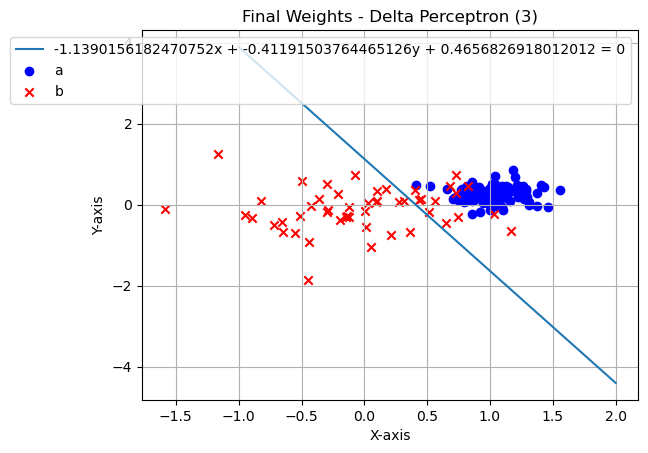

[ 0.46568269 -1.13901562 -0.41191504]


In [162]:
_a = p.W[1]
_b = p.W[2]
_c = p.W[0]
y = (-_a / _b) * x - (_c / _b) # ax + by + c = 0

plt.title("Final Weights - Delta Perceptron (3)")

plt.plot(x, y, label=f'{_a}x + {_b}y + {_c} = 0')
plt.scatter(a_new[0,:], a_new[1,:], c='b', label='a', marker='o')
plt.scatter(b_new[0,:], b_new[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p.W)

In [163]:
holdout = b_holdout
holdout[:,:5]

array([[ 8.53116914e-01, -1.04904227e-04,  5.86705249e-01,
         7.09122383e-02, -6.70414760e-01],
       [-1.06778411e+00, -9.87426288e-03,  4.10039367e-01,
        -1.62974232e-01,  4.11732450e-01],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00]])

In [164]:
X_holdout = np.vstack((np.ones(50), holdout[:2, :]))
y_holdout = holdout[2,:]
X_holdout[:,:5], y_holdout[:5]

(array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00],
        [ 8.53116914e-01, -1.04904227e-04,  5.86705249e-01,
          7.09122383e-02, -6.70414760e-01],
        [-1.06778411e+00, -9.87426288e-03,  4.10039367e-01,
         -1.62974232e-01,  4.11732450e-01]]),
 array([1., 1., 1., 1., 1.]))

In [165]:
predictions = p.predict(X_holdout)
diff = predictions - y_holdout
diff

array([-2.,  0., -2.,  0.,  0.,  0., -2.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2., -2., -2.,  0., -2.,
        0., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2.])

In [166]:
accuracy = np.sum(np.array(diff == 0, dtype=int)) / len(diff)
accuracy

0.78

---------------

- 20% from a subset of classA for which classA(1,:)<0 and 80% from a subset of classA for which classA(1,:)>0

In [167]:
a_new = a

In [168]:
b_less_zero = b[:, b[0, :] < 0]
b_more_zero = b[:, b[0, :] >= 0]
b_less_zero.shape, b_more_zero.shape

((3, 51), (3, 49))

In [169]:
l1 = int(b_less_zero.shape[1]/5)
print(l1)
b_less_zero_holdout = b_less_zero[:, :l1]
b_less_zero = b_less_zero[:, l1:]

l2 = int(b_more_zero.shape[1]/5*4)
print(l2)
b_more_zero_holdout = b_more_zero[:, :l2]
b_more_zero = b_more_zero[:, l2:]

b_more_zero.shape, b_less_zero.shape, b_more_zero_holdout.shape, b_less_zero_holdout.shape

10
39


((3, 10), (3, 41), (3, 39), (3, 10))

In [170]:
kept = np.hstack((b_less_zero, b_more_zero, a_new))
dataset = np.vstack((np.ones(kept.shape[1]), kept))
dataset[:, :4], dataset.shape

(array([[ 1.        ,  1.        ,  1.        ,  1.        ],
        [-0.42507957, -0.11837556, -0.21125682, -0.82344187],
        [-0.03666337, -0.06035618,  0.25927916,  0.09620695],
        [ 1.        ,  1.        ,  1.        ,  1.        ]]),
 (4, 151))

shuffle

In [171]:
rng.shuffle(dataset, axis=1)
dataset[:,:5]

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.72016044, -0.00757176, -0.29956553,  1.13604586, -0.00868841],
       [-0.50741047, -0.88647166, -0.18055007,  0.1762182 , -0.09676605],
       [ 1.        ,  1.        ,  1.        , -1.        ,  1.        ]])

In [172]:
X_train = dataset[:3,:]
y_train = dataset[3,:]
X_train.shape, y_train.shape

((3, 151), (151,))

In [173]:
holdout = np.hstack((b_less_zero_holdout, b_more_zero_holdout))
holdout_set = np.vstack((np.ones(holdout.shape[1]), holdout))
holdout_set[:,:4]

array([[ 1.        ,  1.        ,  1.        ,  1.        ],
       [-0.65234593, -0.18999131, -0.55348471, -0.29916087],
       [-0.43222445, -0.37772446, -0.69366483,  0.5137884 ],
       [ 1.        ,  1.        ,  1.        ,  1.        ]])

In [174]:
X_holdout = holdout_set[:3,:]
y_holdout = holdout_set[3,:]
X_holdout.shape, y_holdout.shape

((3, 49), (49,))

now ready

In [175]:
p = PerceptronDeltaRuleClassifier(0.01)

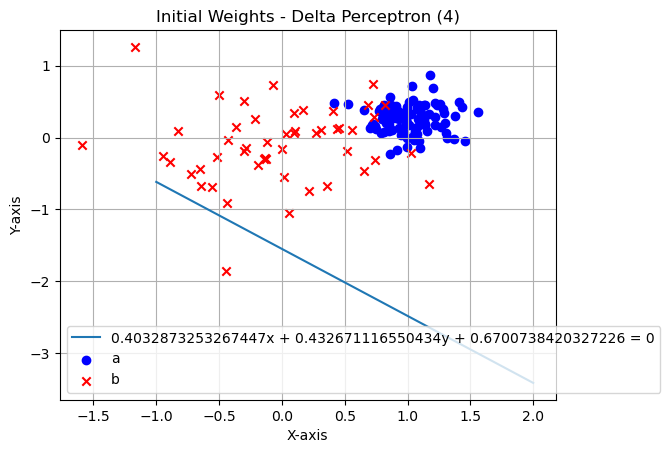

[0.67007384 0.40328733 0.43267112]


In [176]:
_a = p.W[1]
_b = p.W[2]
_c = p.W[0]
y = (-_a / _b) * x - (_c / _b) # ax + by + c = 0
plt.title("Initial Weights - Delta Perceptron (4)")

plt.plot(x, y, label=f'{_a}x + {_b}y + {_c} = 0')
plt.scatter(a_new[0,:], a_new[1,:], c='b', label='a', marker='o')
plt.scatter(b_new[0,:], b_new[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p.W)

In [177]:
for _ in range(200):
    p.fit_one_epoch(X_train, y_train)

0.8398995908294953
Weights after 0 points: [0.67847284 0.3972387  0.42840938]
0.704307729219644
0.5096892118681137
-2.2143301818977497
0.37513426237341274
-2.0664907453830628
-2.085404495888578
-2.0251041602935915
-1.9505466713088926
1.2868470738866882
-1.9140068321765358
Weights after 10 points: [0.58467379 0.27339835 0.37502641]
-2.1557281615810804
-1.810819590370552
0.30135621552540015
-1.8868514738972428
0.5957480716387678
-1.7292755375497202
0.271603767923687
0.4716370926696797
-1.7170265927304913
-1.9266636980867355
Weights after 20 points: [0.48881359 0.16014697 0.34255445]
-1.9003416338855406
-1.628402991719656
-1.678348191839469
-1.577209276543896
0.7558739110557052
-1.4627638383723245
0.70157156518944
-1.5867963188072163
0.4364142063947246
0.7152095858204
Weights after 30 points: [0.41656566 0.05174358 0.31416157]
-1.4892759864906622
0.6642930119620403
-1.5778269430385858
-1.5207232858849866
0.35892678924351507
-1.498596795262569
0.43992365506576525
0.930487836997506
-1.43610

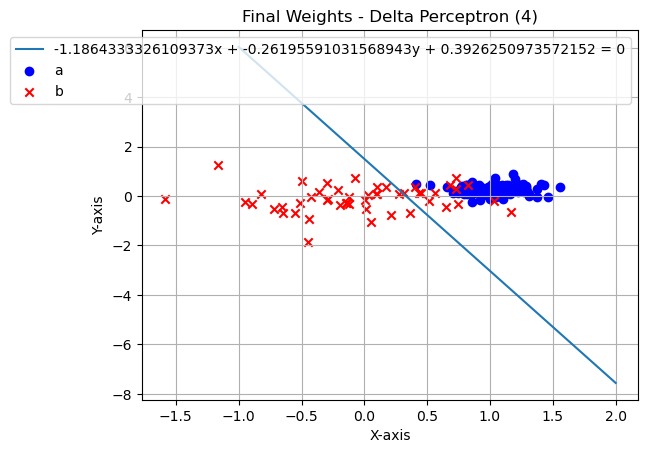

[ 0.3926251  -1.18643333 -0.26195591]


In [178]:
_a = p.W[1]
_b = p.W[2]
_c = p.W[0]
y = (-_a / _b) * x - (_c / _b) # ax + by + c = 0

plt.title("Final Weights - Delta Perceptron (4)")

plt.plot(x, y, label=f'{_a}x + {_b}y + {_c} = 0')
plt.scatter(a_new[0,:], a_new[1,:], c='b', label='a', marker='o')
plt.scatter(b_new[0,:], b_new[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p.W)

In [179]:
predictions = p.predict(X_holdout)
diff = predictions - y_holdout
predictions, diff

(array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1,
        -1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1,  1,
         1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2., -2., -2.,
         0.,  0., -2., -2., -2.,  0., -2.,  0., -2., -2.,  0.,  0.,  0.,
        -2., -2.,  0.,  0., -2., -2., -2.,  0.,  0., -2., -2.,  0.,  0.,
        -2., -2.,  0., -2., -2.,  0.,  0.,  0.,  0.,  0.]))

In [180]:
accuracy = np.sum(np.array(diff == 0, dtype=int)) / len(diff)
accuracy

0.5918367346938775